In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='microsoft/deberta-base'

In [3]:
results = {'acc':[],
           'f1':[],
           'g':[]}

In [4]:
gammas = [2,4,8,16]
lr = 1.0e-5


for g in gammas:
    print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=0.0,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          accumulation_steps=2,
                          gamma=g,
                          early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search microsoft/deberta-base, learning rate 1e-05 focal loss, gamma: 2


Filter:   0%|          | 0/1796 [00:00<?, ? examples/s]

Filter:   0%|          | 0/256 [00:00<?, ? examples/s]

Filter:   0%|          | 0/457 [00:00<?, ? examples/s]

Map:   0%|          | 0/1324 [00:00<?, ? examples/s]

Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	7.7048	Val Loss:	2.0122	Accuracy:	0.3787	F1:	0.3085
2 / 30: Train Loss:	5.7800	Val Loss:	1.5040	Accuracy:	0.5148	F1:	0.4806
3 / 30: Train Loss:	3.2897	Val Loss:	1.2241	Accuracy:	0.5799	F1:	0.5580
4 / 30: Train Loss:	1.8791	Val Loss:	1.0909	Accuracy:	0.6213	F1:	0.6032
5 / 30: Train Loss:	1.2025	Val Loss:	0.9447	Accuracy:	0.6834	F1:	0.6732
6 / 30: Train Loss:	0.7793	Val Loss:	0.9067	Accuracy:	0.7041	F1:	0.6922
7 / 30: Train Loss:	0.5454	Val Loss:	0.9244	Accuracy:	0.7041	F1:	0.6967
8 / 30: Train Loss:	0.3431	Val Loss:	0.8836	Accuracy:	0.6953	F1:	0.6940
9 / 30: Train Loss:	0.2080	Val Loss:	0.8402	Accuracy:	0.7189	F1:	0.7124
10 / 30: Train Loss:	0.1322	Val Loss:	0.8217	Accuracy:	0.7367	F1:	0.7191
11 / 30: Train Loss:	0.0984	Val Loss:	0.8316	Accuracy:	0.7308	F1:	0.7375
12 / 30: Train Loss:	0.0658	Val Loss:	0.8645	Accuracy:	0.7130	F1:	0.7106
13 / 30: Train Loss:	0.0589	Val Loss:	0.8158	Accuracy:	0.7308	F1:	0.7338
14 / 30: Train Loss:	0.0440	Val Loss:	0.8505	Accuracy:	0.721

Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	5.9952	Val Loss:	1.9534	Accuracy:	0.4497	F1:	0.3820
2 / 30: Train Loss:	4.0118	Val Loss:	1.5233	Accuracy:	0.5178	F1:	0.4836
3 / 30: Train Loss:	2.0692	Val Loss:	1.2678	Accuracy:	0.5888	F1:	0.5632
4 / 30: Train Loss:	1.1380	Val Loss:	1.1277	Accuracy:	0.6243	F1:	0.6042
5 / 30: Train Loss:	0.7054	Val Loss:	1.0073	Accuracy:	0.7012	F1:	0.6883
6 / 30: Train Loss:	0.4589	Val Loss:	0.9626	Accuracy:	0.6893	F1:	0.6827
7 / 30: Train Loss:	0.3150	Val Loss:	1.0077	Accuracy:	0.6834	F1:	0.6796
8 / 30: Train Loss:	0.1957	Val Loss:	0.9206	Accuracy:	0.7041	F1:	0.6983
9 / 30: Train Loss:	0.1155	Val Loss:	0.8802	Accuracy:	0.7130	F1:	0.6973
10 / 30: Train Loss:	0.0747	Val Loss:	0.8608	Accuracy:	0.7278	F1:	0.7160
11 / 30: Train Loss:	0.0676	Val Loss:	0.8822	Accuracy:	0.7130	F1:	0.7036
12 / 30: Train Loss:	0.0537	Val Loss:	0.8626	Accuracy:	0.7219	F1:	0.7168
13 / 30: Train Loss:	0.0605	Val Loss:	0.8819	Accuracy:	0.7012	F1:	0.7032
14 / 30: Train Loss:	0.0391	Val Loss:	0.8477	Accuracy:	0.718

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	3.6735	Val Loss:	1.9880	Accuracy:	0.3905	F1:	0.3481
2 / 30: Train Loss:	2.0419	Val Loss:	1.5793	Accuracy:	0.5414	F1:	0.5114
3 / 30: Train Loss:	0.9402	Val Loss:	1.3487	Accuracy:	0.6213	F1:	0.5938
4 / 30: Train Loss:	0.4992	Val Loss:	1.2152	Accuracy:	0.6509	F1:	0.6147
5 / 30: Train Loss:	0.2961	Val Loss:	1.1234	Accuracy:	0.6864	F1:	0.6752
6 / 30: Train Loss:	0.2224	Val Loss:	1.1051	Accuracy:	0.6805	F1:	0.6763
7 / 30: Train Loss:	0.1278	Val Loss:	1.0661	Accuracy:	0.7071	F1:	0.7034
8 / 30: Train Loss:	0.0765	Val Loss:	1.0311	Accuracy:	0.7101	F1:	0.6987
9 / 30: Train Loss:	0.0532	Val Loss:	0.9933	Accuracy:	0.7071	F1:	0.6994
10 / 30: Train Loss:	0.0297	Val Loss:	0.9677	Accuracy:	0.7071	F1:	0.6909
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.69      0.75      0.72        67
               anecdote       0.84      0.88      0.86      

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.4177	Val Loss:	2.0348	Accuracy:	0.4231	F1:	0.4094
2 / 30: Train Loss:	0.7349	Val Loss:	1.7154	Accuracy:	0.5207	F1:	0.4902
3 / 30: Train Loss:	0.3245	Val Loss:	1.5237	Accuracy:	0.6124	F1:	0.5815
4 / 30: Train Loss:	0.1577	Val Loss:	1.4049	Accuracy:	0.6716	F1:	0.6462
5 / 30: Train Loss:	0.0912	Val Loss:	1.3402	Accuracy:	0.6923	F1:	0.6744
6 / 30: Train Loss:	0.0622	Val Loss:	1.3132	Accuracy:	0.6864	F1:	0.6826
7 / 30: Train Loss:	0.0381	Val Loss:	1.2605	Accuracy:	0.6923	F1:	0.6791
8 / 30: Train Loss:	0.0218	Val Loss:	1.2147	Accuracy:	0.6864	F1:	0.6737
9 / 30: Train Loss:	0.0157	Val Loss:	1.1906	Accuracy:	0.6953	F1:	0.6922
10 / 30: Train Loss:	0.0102	Val Loss:	1.1582	Accuracy:	0.6982	F1:	0.6977
11 / 30: Train Loss:	0.0094	Val Loss:	1.1446	Accuracy:	0.6953	F1:	0.6853
12 / 30: Train Loss:	0.0089	Val Loss:	1.1921	Accuracy:	0.6479	F1:	0.6551
13 / 30: Train Loss:	0.0080	Val Loss:	1.1400	Accuracy:	0.6834	F1:	0.6792
No improvement for 3 epochs. Stopping early.
best (higgest m

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

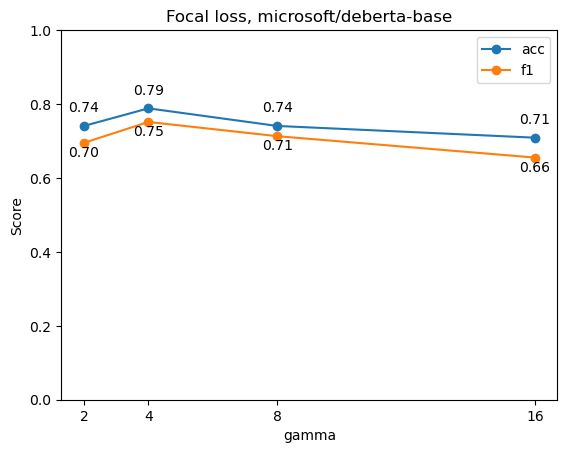

In [6]:
def plot_grid_search(df, title, column):

    # Create the plot
    ax = df.plot(x=column, y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row[column], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row[column], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df[column], [val for val in df[column]], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('gamma')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Focal loss, {model_checkpoint}', 'g')